# **The "Titanic" Project**

## *Contents*

1) Problem Analysis and Definition

2) Data "Collection"

3) Light Data Analysis

3) Data Cleaning

4) Data Transformation

5) Data Modelling

6) Results Submission

## **Problem Analysis and Definition**

Understanding the history and context of the data allows for a better analysis.
The data set covers the fate of the passengers on the Titanic, a ship that sunk after hitting an iceburg. 
The data provided consists of a subset of the passengers on board the ship (891 out of 2240), 
split into the following two groups, 
1) A set for testing ("test.csv" - which doesnt contain details of the passengers survival) <br>
2) A set for training ("train.csv" - which does contain details of the passengers survival). <br>

The data contains several fields about each passenger (alongside the key detail of whether they lived or not)
such as their age, information about their family, their social class, and so on. 
The aim of this project is to create a model to predict a passengers survival using this given data.

## **Data "Collection"**

Importing the correct modules for later in project (including visualisation and modelling modules)<br>
The final code here outputs the input files from kaggle (datasets)

In [1]:
# This is the code given by default by kaggle for the competition - it has been edited in some places

# Default Imports
import numpy as np 
import pandas as pd 

# Added Imports for Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt

# Added Imports for Modelling/ML
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report


# Default given code to output input files from Kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


The code below imports the data from the given CSVs into data frames.<br>
Datasets are also "combined" (joined by column) so that this pointer can be used to perform transformative actions on both datasets at once later on in the code (eg: changing column names of both in one line of code).
<br><br>
As can be seen by printing each of the column headings for both datasets, the only current difference is the lack of "Suvived" attribute for the testing data.

In [2]:
# Import the data frames from the provided CSVs
training_data = pd.read_csv('/kaggle/input/titanic/train.csv')
testing_data = pd.read_csv('/kaggle/input/titanic/test.csv')

# Combined into a list, in order to iterate through later when changing both data frames at once
combined_datasets = [training_data, testing_data]

print(training_data.columns.values)
print(testing_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


## **Light Data Analysis**
In this section, I will inspect whether the data is catagorical or numerical - as this will change how we analyse the data at first. <br>
This can be seen by inspecting the datas head and analysing the values carefully to ensure their data type.

In [3]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As seen by the snippet of the data frame above, it is obvious which data is catagorical and numerical. These two sections will be explored differently - as catagorical datatypes cannot be analysed using popular visualisations such as histograms <br><br>
***Catagorical Attributes***
- Survived (Boolean, Catagorical)
- Sex (Boolean, Catagorical)
- Embarked (Char, Catagorical)
- Pclass (Int, Ordinal) <br>

***Numerical Attributes***
- Age (Int)
- Fare (Float)
- SibSp (Int)
- Parch (Int)

***Mixed DataTypes***
- Ticket (Mostly Ints, some with a leading String)
- Cabin (Int with leading Char) <br>

Mixed datatypes make analysing and exploring those datatypes more complex. To better analyse and compare this data, mixed datatypes should be sorted into catagories (such as taking only the leading letter for each cabin number) or transformed into pure ints (such as  removing leading strings from the ticket, leaving only the integer to fit the format of most of the tickets).
<br>
Before visualising or cleaning the now untransformed data, I will use the pandas info() and describe() functions to get a general idea about the data to raise some questions, which in asnwering will allow for a greater understanding of the data, and therefore (hopefully) a better prepared dataframe for training. 

In [4]:
training_data.info()
print(".........................................................")
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
.........................................................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----

**Info() Findings:**
In general, training and testing null proportions for each variable are the same (data frames are comparable, as expected).
Some interesting numbers to pay attention to are that there is very little na values for most data - making this a fairly complete data frame. The only variables with large null counts are age - which lacks almost 1/8t of the possibble values in both data sets, and cabin (wihch stores the cabin ID) - which lacks almost 3/4 of possible values. This makes using this variable much more complex - as the amount of values that will have to e approxmiated may be too large to accurately make up for the lost values. 

In [5]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
testing_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
# Describe the dataframe object ('O')
training_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Describe() Findings**
These describe tables are useful for closely inspecting numerical data. <br>
From these tables we can see that there is a large difference in the fair price paid (due to a large standard deviation), that the average age is around 30 years old (younger than the average age at the time, meaning that the ship was taken mostly by younger people), that around half of the people on the ship were travelling with siblings meaning a large amount of people were travelling with family, and including the number of parents or spouses, this number likely climbs even higher.<br>
Using describe(include['O']) is used to get the description of the "object", which in this case, is the data frame itself. This shows how many unique values there are. As can be seen by inspecting the training data, there are large amount of ticket duplications, which is an issue that needs resolving as the ticket value is meant to be unique, however, this could be due to the existance of family tickets or something similar. As names are not dupliucated, we can safely assume that the entire passenger isnt being duplicated, just the ticket number. 

<br><br>
**Basic Numeric Distributions**


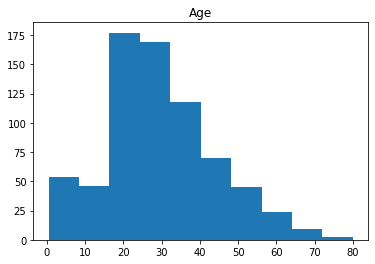

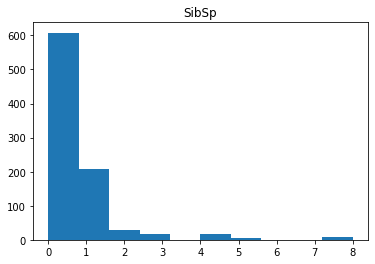

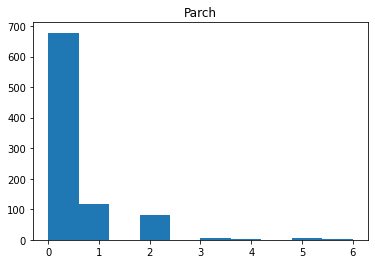

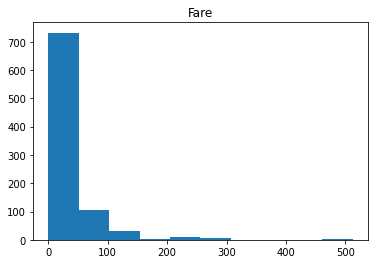

In [8]:
# Split dataframe into catagorical and numerical numbers 
training_data_numerical = training_data[['Age','SibSp','Parch','Fare']]
training_data_catagorical = training_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

# Display numerical variables using histograms to observe distributions
for x in training_data_numerical.columns:
    plt.hist(training_data_numerical[x])
    plt.title(x)
    plt.show()

*Findings*
- Age gives a nice normal distriution, will be useful untransformed 
- Siblings and parent numbers are similar distriutions, likely as families are travelling all together (increasing both at the same rate) - could consider combinging into one "family" attribute
- Fare is a poor distribution, but seems to be in a shape that shows an exponential distribution - taking the log of this curve should give a normalised distribution



<AxesSubplot:>

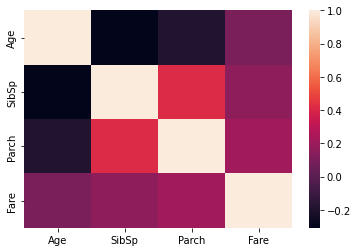

In [9]:
# Display a heatmap to display correlations between numerical variables
sns.heatmap(training_data_numerical.corr())

*Findings* <br>
This step is important to ensure that two attributes arent too strongly correlated - which could lead to Multicollinearity - in which the model too strongly advocates for something due to the two strongly correlating attributes compounding. 
- Age and siblings/spouses are inversely correlated - most likely because most data for this variable is for spouses - as adults are ore likely to be married the older they are
- The strongest correlation is between "parch" and "sibsp" - which suggests that if the person has a spouse/sibling, they are also likely to have a parent/child also present. This follows the logic that entire families are present on the ship. 
- Other correlations are present, but not strong enough to be concerned about changing results negetively.


In [10]:
# Create a simple table that shows the link between variables and survival
pd.pivot_table(training_data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


*Findings* <br>
- In general, younger people are more likely to survive 
- In general, people who paid more for their ticket are more likely to survive (significantly more likely)
- In general, people with parents or children aboard are more likely to survive
- In general, those with siblings or spouses aboard are more likely to not survive (although not significantly)


In [11]:
# Display a series of tables which show the link between the catagories in catagorical variables and how survival is affected
print(pd.pivot_table(training_data, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training_data, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training_data, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training_data, index = 'Survived', columns = 'Parch', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training_data, index = 'Survived', columns = 'SibSp', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

Parch         0     1     2    3    4    5    6
Survived                                       
0         445.0  53.0  40.0  2.0  4.0  4.0  1.0
1         233.0  65.0  40.0  3.0  NaN  1.0  NaN

SibSp         0      1     2     3     4    5    8
Survived                                          
0         398.0   97.0  15.0  12.0  15.0  5.0  7.0
1         210.0  112.0  13.0   4.0   3.0  NaN  NaN


*Findings* <br>
- Class seems to have a large effect on those who survive, with nearly 2/3rds of 1st class passengers surviving, compared to only 1/4 of 3rd class.
- Sex seems to also have a massive effect, there is a huge difference between the proportion of women who survived when compared to their male counterparts.
- As shown before, family size seems to have a positive effect - whether thats have a spouse or having children. 
- Location embarked from does not seem to be statistically significant




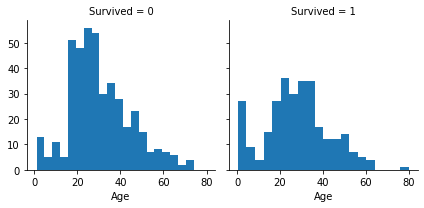

In [12]:
# Create a palet bar chart which better shows how age effects survival
g = sns.FacetGrid(training_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Earlier analysis showed that the age of the passenger was not that significant (although younger people were slightly more likely to live) - this graph shows a mmuch better and easily understandable distribution. It shows that those who are young children are much more likely to survive. This distrubution also shows that for all other age groups, the survival and demise of passengers of any age is quite similar, showing that ignoring the skew provided by children, the chances of surviving are not heavily correlated to age.

In [13]:
# Extract the first string from each name (which is the title)
training_data['Title'] = training_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# Display the number of each titles present
training_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

After listing the titles, we can see that the only statistically significant titles are Mr, Miss, Mrs and Master. These titles are already covered by the age and sex variables. The other titles, which could be significant, such as Countess, are covered by the class variable. This makes including the title obsolete. 


In [14]:
# Removing the Title variable
training_data = training_data.drop(['Title'], axis=1)

# Conclusion

*Variables Included in Modelling*
- Age
- Class
- Sex
- Parch
- SibSp
- Fare

*Variables NOT Included in Modelling*
- Ticket
    - Not relevant, including the fare tells the model everything needed to know about the ticket, alphanumerical string tells us nothing 
- Cabin
    - Excluded due to a lack of compelte dataset, too many null values make using this variable too inaccurate
- Embarked
    - Does not appear to be statisically relevant, also not logically relevant. Titanic sank after all of these destinations were visited. 
- Name
    - Excluding the title due to overlap between a passengers title, and their sex and class, the name is not relevant at all. 


## **Data Cleaning**


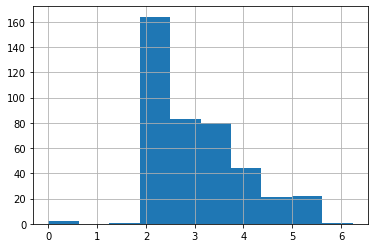

In [15]:
# Fill NA values in variables with the averages to fill data set
testing_data.Age = testing_data.Age.fillna(testing_data.Age.median())
testing_data.Fare = testing_data.Fare.fillna(testing_data.Fare.mean())

# Drop unneeded data
testing_data = testing_data.drop(['Ticket'], axis=1)
testing_data = testing_data.drop(['Cabin'], axis=1)
testing_data = testing_data.drop(['Embarked'], axis=1)
testing_data = testing_data.drop(['Name'], axis=1)

# Translate fare prices into logorithic data to normalise and drop fare
testing_data['LogFare'] = np.log(testing_data.Fare+1)
testing_data['LogFare'].hist()
testing_data = testing_data.drop(['Fare'], axis=1)

# Replace catagorical sex strings with int values
testing_data['Sex'] = testing_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

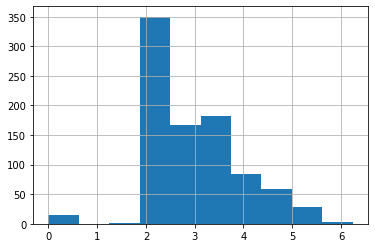

In [16]:
# Fill NA values in variables with the averages to fill data set
training_data.Age = training_data.Age.fillna(training_data.Age.median())
training_data.Fare = training_data.Fare.fillna(training_data.Fare.mean())

# Drop unneeded data
training_data = training_data.drop(['Ticket'], axis=1)
training_data = training_data.drop(['Cabin'], axis=1)
training_data = training_data.drop(['Embarked'], axis=1)
training_data = training_data.drop(['Name'], axis=1)

# Translate fare prices into logorithic data to normalise and drop fare
training_data['LogFare'] = np.log(training_data.Fare+1)
training_data['LogFare'].hist()
training_data = training_data.drop(['Fare'], axis=1)

# Replace catagorical sex strings with int values
training_data['Sex'] = training_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [17]:
# Confirm data changes
training_data.info()
training_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   LogFare      891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,LogFare
0,1,0,3,0,22.0,1,0,2.110213
1,2,1,1,1,38.0,1,0,4.280593
2,3,1,3,1,26.0,0,0,2.188856
3,4,1,1,1,35.0,1,0,3.990834
4,5,0,3,0,35.0,0,0,2.202765


In [18]:
# Confirm data changes
testing_data.info()
testing_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   LogFare      418 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


,PassengerId,Pclass,Sex,Age,SibSp,Parch,LogFare
0,892,3,0,34.5,0,0,2.178064
1,893,3,1,47.0,1,0,2.079442
2,894,2,0,62.0,0,0,2.369075
3,895,3,0,27.0,0,0,2.268252
4,896,3,1,22.0,1,1,2.586824


## **Data Modelling**


***Data Preparation***

In [19]:
# Seperate independant and dependant variables
X_train = training_data[['Pclass','Sex','Age','SibSp','Parch','LogFare']]
y_train = training_data['Survived']
X_test = testing_data[['Pclass','Sex','Age','SibSp','Parch','LogFare']]

len(X_test)

418

***Model Usage***

In [20]:
# Logistic Regression Model Use
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
lrScore = round(lr.score(X_train, y_train), 2)
print(lrScore)

0.8


In [21]:
# Support Vector Classification Use
svc = SVC()
svc.fit(X_train, y_train)
y_test = svc.predict(X_test)
svcScore = round(svc.score(X_train, y_train), 2)
print(svcScore)

0.72


In [22]:
# K Neighbors Classifier Use
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_test = knn.predict(X_test)
knnScore = round(knn.score(X_train, y_train), 2)
knnScore

0.89

In [23]:
# Gaussian Use
gs = GaussianNB()
gs.fit(X_train, y_train)
y_test = gs.predict(X_test)
gsScore = round(gs.score(X_train, y_train), 2)
gsScore

0.77

In [24]:
# Decision Tree Use
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_test = dt.predict(X_test)
dtScore = round(dt.score(X_train, y_train), 2)
dtScore

0.98

In [25]:
# Random Forrest Classifier Use
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_test = rf.predict(X_test)
rf.score(X_train, y_train)
rfScore = round(rf.score(X_train, y_train), 2)
rfScore

0.98

It appears clearly that Random Forest Classifier and Decision Tree are the most accurate models used. 
I will choose to submit The Decision Tree model predictions, as the data set is small, and random forest is likely too complex for the predictions that are to be made- and therefore may overanalyse the data (as well as simply not being as efficient for the small task at hand).

## **Submission**

In [26]:
# Decision Tree Use
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_test_Final = dt.predict(X_test)

submission = pd.DataFrame({
        "PassengerId": testing_data["PassengerId"],
        "Survived": y_test_Final
    })

submission.to_csv('submission.csv', index =False)